# Principal component Analysis

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique that allows you to analyze and interpret the underlying structure of a dataset. It is especially useful when dealing with high-dimensional data, as it can simplify the data while retaining important information. In this teaching session, I'll cover the basic concepts, steps, and applications of PCA.

**1. What is PCA?**
PCA is a statistical technique that transforms a dataset into a new coordinate system by identifying the directions (principal components) along which the data varies the most. The first principal component captures the maximum amount of variance in the data, and each subsequent component captures as much of the remaining variance as possible while being orthogonal (uncorrelated) to the previous components.

**2. Steps of PCA:**
The PCA algorithm involves the following steps:

a. Standardize the data: If the features in the dataset are measured on different scales, it's important to standardize them (subtract the mean and divide by the standard deviation) to give them equal importance during analysis.

b. Compute the covariance matrix: Calculate the covariance matrix of the standardized data. The covariance between two variables measures their relationship and how they vary together.

c. Compute the eigenvectors and eigenvalues: Find the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the principal components, and eigenvalues quantify the amount of variance explained by each component.

d. Sort eigenvalues: Sort the eigenvalues in descending order to determine the most important principal components. The eigenvectors corresponding to the largest eigenvalues are the directions along which the data varies the most.

e. Select the desired number of components: Decide how many principal components to retain based on the amount of variance explained. Retaining more components preserves more information but increases the dimensionality.

f. Create the projection matrix: Construct a projection matrix by selecting the top eigenvectors based on the desired number of components.

g. Project the data: Multiply the standardized data by the projection matrix to obtain the new transformed dataset in the reduced-dimensional space.

**3. Applications of PCA:**
PCA has various applications across different domains, including:

a. Dimensionality reduction: PCA is commonly used to reduce the dimensionality of high-dimensional datasets while preserving important information. It helps in visualization, computational efficiency, and noise reduction.

b. Data visualization: PCA can be employed to visualize high-dimensional data in a lower-dimensional space (e.g., 2D or 3D) while maintaining the most significant variations. This allows easier data exploration and pattern recognition.

c. Feature extraction: PCA can be used to transform a set of potentially correlated features into a new set of uncorrelated features (principal components). These components can capture the essential information in the data, making them useful for subsequent analysis or modeling.

d. Noise filtering: By reconstructing the data from a reduced set of principal components, PCA can effectively remove noise or irrelevant variations in the dataset, helping to enhance the signal-to-noise ratio.

e. Anomaly detection: PCA can identify anomalies or outliers in the data by measuring how far data points deviate from the expected distribution based on the principal components.

f. Image and signal processing: PCA is applied to compress images, reduce noise in signals, or analyze image features by representing them in a lower-dimensional space.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
## Load dataset
from sklearn.datasets import load_breast_cancer

In [4]:
cancer_dataset = load_breast_cancer()

In [5]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
df = pd.DataFrame(cancer_dataset['data'], columns = cancer_dataset['feature_names'])

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Here we want to apply PCA(Dimensional Reductionality)

### 1. First step is Standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df)


StandardScaler()

In [13]:
scaled_data = scaler.transform(df)

In [14]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### 2. Apply PCA

In [15]:
from sklearn.decomposition import PCA

In [17]:
# EWxtracting 2 features from 30 features
pca = PCA(n_components= 2)

In [18]:
data_pca = pca.fit_transform(scaled_data)

In [19]:
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [21]:
# here we have variance capture after projection of the datapoints
# note pc1 will always be greater than pc2 (pc1>>pc2)
# if 3d then pc1>>pc2>>pc3
pca.explained_variance_

array([13.30499079,  5.7013746 ])

Text(0, 0.5, 'Second Principal Component')

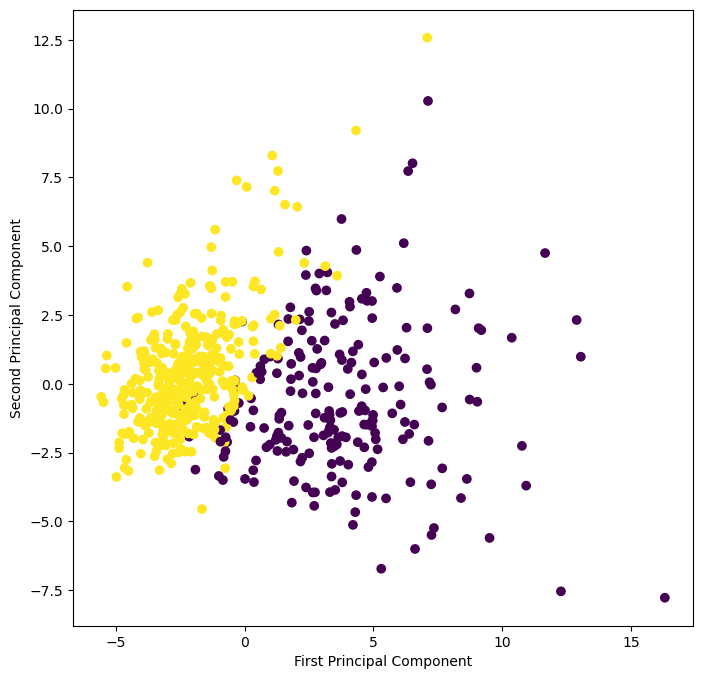

In [28]:
plt.figure(figsize = (8, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c= cancer_dataset['target'])
plt.xlabel('First Principal Component')
plt.ylabel ('Second Principal Component')

# practical and commonly used case of PCA

One practical and commonly used case of PCA is for:

**1. dimensionality reduction and**

**2. data visualization.** 

Let's walk through an example of using PCA in Python to reduce the dimensionality of a dataset and visualize it.

For this example, we will use the well-known Iris flower dataset, which contains measurements of four features (sepal length, sepal width, petal length, and petal width) for three different species of Iris flowers.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris



In [30]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [31]:
# Standardize the features
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Perform PCA
pca = PCA(n_components=2)  # We want to reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_std)


In [33]:
# Create a DataFrame for the reduced dataset
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [36]:
# Get the target names
target_names = iris.target_names

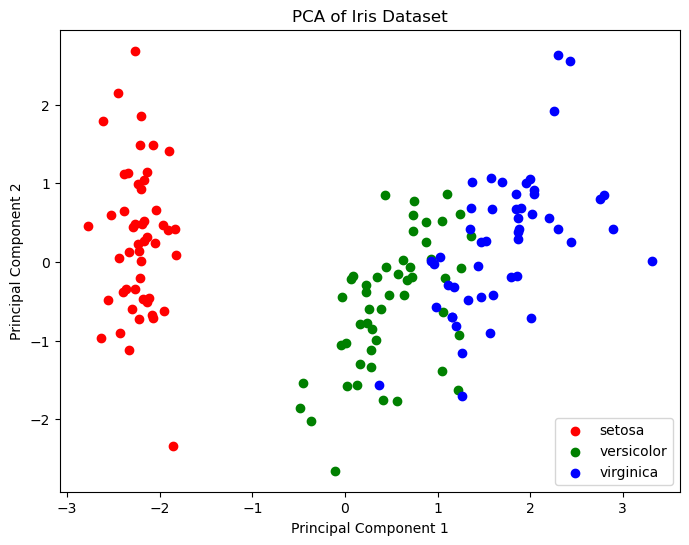

In [37]:
# Visualize the reduced dataset
plt.figure(figsize=(8, 6))
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = pca_df['target'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c=color, label=target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

Interpreting the scatter plot generated from the PCA of the Iris dataset involves analyzing the distribution and separation of data points in the reduced 2-dimensional space. Here are some key aspects to consider when interpreting the scatter plot:

1. **Data point distribution**: Observe the distribution of the data points in the plot. Look for any clustering or patterns that emerge. Clusters or groups of points close to each other may indicate similarities or correlations between the corresponding samples.

2. **Separation between classes**: Notice how well-separated the different classes of Iris flowers are in the plot. If the classes are well-separated, it suggests that the selected principal components (PC1 and PC2) effectively capture the variations that differentiate the classes. On the other hand, if the classes overlap significantly, it may indicate that the selected components do not fully capture the class separability.

3. **Direction and length of principal components**: Consider the directions and lengths of the arrows that represent the principal components. The arrows show the orientation and relative importance of the original features in the reduced-dimensional space. Longer arrows indicate higher influence on the corresponding principal component.

4. **Variance explained**: PCA provides information about the amount of variance explained by each principal component. Typically, the explained variance ratio is provided as a result of the PCA. You can use this information to understand how much information each principal component retains. The higher the explained variance ratio, the more information is captured by the corresponding principal component.

5. **Outliers**: Look for any potential outliers in the plot—data points that are significantly distant from the main clusters or groups. Outliers may represent unusual or exceptional cases that deviate from the general patterns observed in the data.

Remember that in this specific scatter plot, the axes correspond to the selected principal components (PC1 and PC2) rather than the original features. Therefore, the interpretation focuses on the relationships and distributions of the data points in the reduced 2-dimensional space rather than the specific feature values.

In the case of the Iris dataset, the scatter plot generated from PCA typically exhibits well-separated clusters for each Iris species, indicating that the selected principal components effectively capture the variations that differentiate the species. The plot can also demonstrate the relationships and similarities between different Iris samples based on their feature measurements.

Keep in mind that interpretations may vary depending on the dataset and the specific application of PCA. It's essential to combine the insights from the scatter plot with domain knowledge and further analysis to gain a comprehensive understanding of the underlying data patterns.